 # offline: design the trajectory for 6DOF of end-effector of Kinova 

In [201]:
import numpy as np
import math as math
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
import matplotlib as mpl



In [6]:
# consider of three objects on a circle
Obj1_Pos = [-0.35, -0.35, 0]
Obj2_Pos = [-0.5, 0, 0]
Obj3_Pos = [-0.35, 0.35, 0]

# these angles should be the corresponding euler angles for final end-effector grasp pose 
# possible final value for grasping obj1 [Roll, Pitch, Yaw] 
Obj1_Orn = [math.pi/3, 0, 0]
# possible final value for grasping obj2 [Roll, Pitch, Yaw]
Obj2_Orn = [0, math.pi/2, 0]
# possible final value for grasping obj3 [Roll, Pitch, Yaw]
Obj3_Orn = [0, 0, -math.pi/2]


# Object informations
# object 1
X_f1 = Obj1_Pos[0]
Y_f1 = Obj1_Pos[1]
Z_f1 = Obj1_Pos[2]
Roll_f1 = Obj1_Orn[0]
Pitch_f1 = Obj1_Orn[1]
Yaw_f1 = Obj1_Orn[2]
# object 2
X_f2 = Obj2_Pos[0]
Y_f2 = Obj2_Pos[1]
Z_f2 = Obj2_Pos[2]
Roll_f2 = Obj2_Orn[0]
Pitch_f2 = Obj2_Orn[1]
Yaw_f2 = Obj2_Orn[2]
# object 3
X_f3 = Obj3_Pos[0]
Y_f3 = Obj3_Pos[1]
Z_f3 = Obj3_Pos[2]
Roll_f3 = Obj3_Orn[0]
Pitch_f3 = Obj3_Orn[1]
Yaw_f3 = Obj3_Orn[2]


# the initial position/orientation data for the end-effector

# in meter
pos_0 = [-0.16466346383094788, -0.08997702598571777, 0.24762019515037537]
# in radian
eulOrn_0 = (3.0612682251627628, 0.10540373927460898, 1.199751013269177)

X_0 = pos_0[0]
Y_0 = pos_0[1]
Z_0 = pos_0[2]
Roll_0, Pitch_0, Yaw_0 = eulOrn_0 

# the final desired positions and orientations
Example = 5 # for recording name
obj =1
Obj_GraspPos = [-0.36, -0.34, 0.03]
#Obj_Orn = [math.pi/2, math.pi/3, 2*math.pi/3]
Obj_GraspOrn = [3.0612682251627628, 1.5, 1.199751013269177]
X_f = Obj_GraspPos[0]
Y_f = Obj_GraspPos[1]
Z_f = Obj_GraspPos[2]
Roll_f = Obj_GraspOrn[0] 
Pitch_f = Obj_GraspOrn[1]
Yaw_f = Obj_GraspOrn[2] 



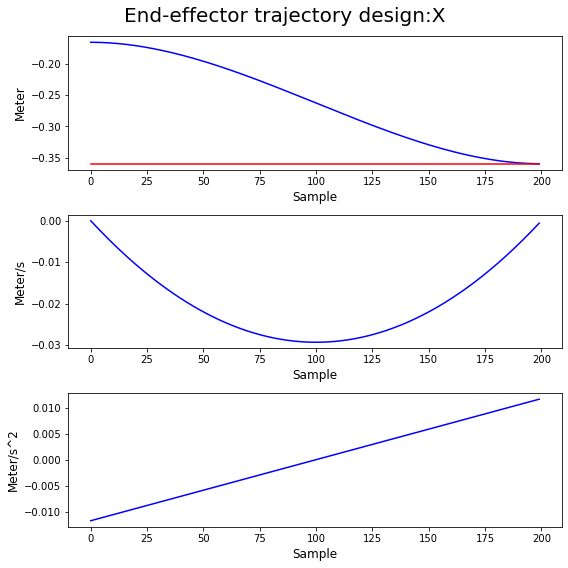

In [204]:
# desgin of trajectory for individual positions and orientation 
# method of desgin: Time history of position(orientation), velocity(angular vel) and acceleration(angular acc) with a cubic polynomial timing law
# the general equation: q(t) = a3*t^3 + a2*t^2 + a1*t + a0
# assumption; the initial vel and final vel is zero

# the final time: t_f
t_f = 10 # second
timestep = 0.05 # frequency
t = np.arange(0,t_f,timestep)

def FindCoeffs(t_f, Initial, Final):
    a0 = Initial
    a3, a2 = symbols('a3 a2')
    eq1 = Eq(a3*(t_f**3)+a2*(t_f**2)+a0 - Final,0)
    eq2 = Eq(3*a3*(t_f**2)+2*a2*t_f,0)
    sol_dict = solve((eq1,eq2), (a3, a2))
    A3 = sol_dict[a3]
    A2 = sol_dict[a2]
    
    return A3, A2

def FindKinematics(t, Initial, A3, A2):
    a0 = Initial
    # position
    Pos = A3*(t**3)+A2*(t**2)+a0
    # change the dtype and give it 2D
    Pos = Pos.astype('float64')
    Pos = np.array([Pos])
    
    # velocity
    Vel = 3*A3*(t**2)+2*A2*t
    # change the dtype and give it 2D
    Vel = Vel.astype('float64')
    Vel = np.array([Vel])

    # acceleration
    Accel = 6*A3*(t)+2*A2
    # change the dtype and give it 2D
    Accel = Accel.astype('float64')
    Accel = np.array([Accel])

    
    return Pos, Vel, Accel



# for x position
Initial = X_0
Final = X_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
X_Pos, X_Vel, X_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory design:X', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t*(1/timestep),X_Pos.T,'b')
        axes[kin].plot(t*(1/timestep),np.ones(len(t))*Obj_GraspPos[0],color=ListMarker[1],label='X_Obj'+str(obj))
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t*(1/timestep),X_Vel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t*(1/timestep),X_Accel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/X_ForObj'+str(obj)+'_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)


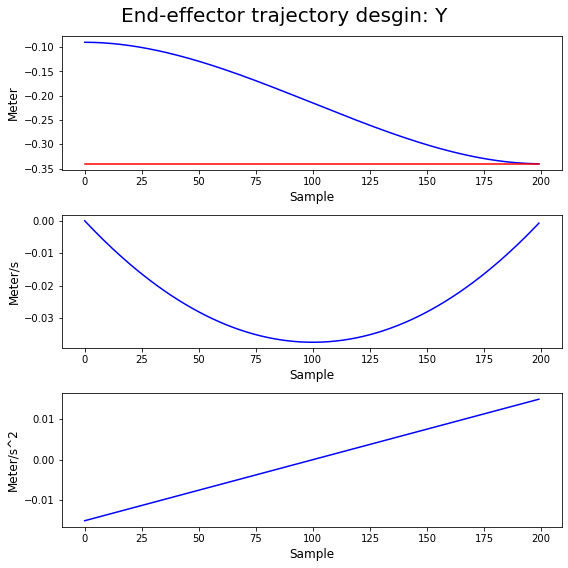

In [205]:
# for y position
Initial = Y_0
Final = Y_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Y_Pos, Y_Vel, Y_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory desgin: Y', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t*(1/timestep),Y_Pos.T,'b')
        axes[kin].plot(t*(1/timestep),np.ones(len(t))*Obj_GraspPos[1],color=ListMarker[1],label='Y_Obj'+str(obj))
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t*(1/timestep),Y_Vel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t*(1/timestep),Y_Accel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/Y_ForObj'+str(obj)+'_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)

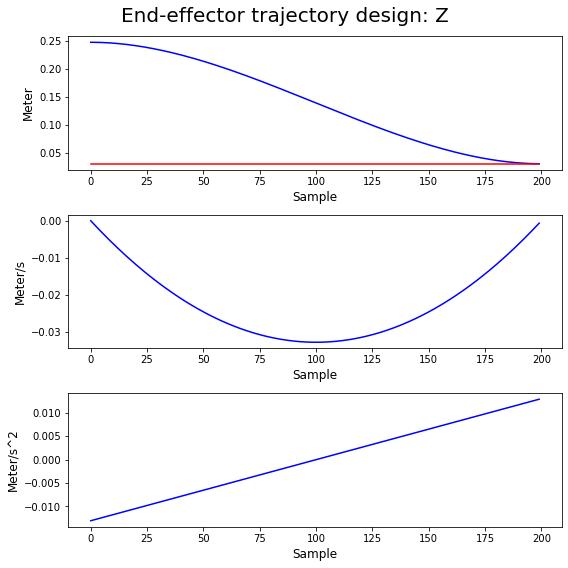

In [206]:
# for z position
Initial = Z_0
Final = Z_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Z_Pos, Z_Vel, Z_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory design: Z', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t*(1/timestep),Z_Pos.T,'b')
        axes[kin].plot(t*(1/timestep),np.ones(len(t))*Obj_GraspPos[2],color=ListMarker[1],label='Z_Obj'+str(obj))
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t*(1/timestep),Z_Vel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t*(1/timestep),Z_Accel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Meter/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/Z_ForObj'+str(obj)+'_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)

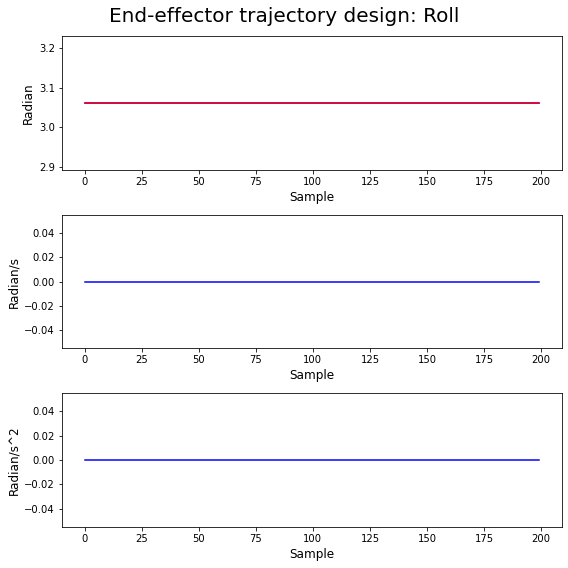

In [207]:
# for roll orientation
Initial = Roll_0
Final = Roll_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Roll_Pos, Roll_Vel, Roll_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory design: Roll', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t*(1/timestep),Roll_Pos.T,'b')
        axes[kin].plot(t*(1/timestep),np.ones(len(t))*Obj_GraspOrn[0],color=ListMarker[1],label='Roll_Obj'+str(obj))
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t*(1/timestep),Roll_Vel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t*(1/timestep),Roll_Accel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/Roll_ForObj'+str(obj)+'_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)

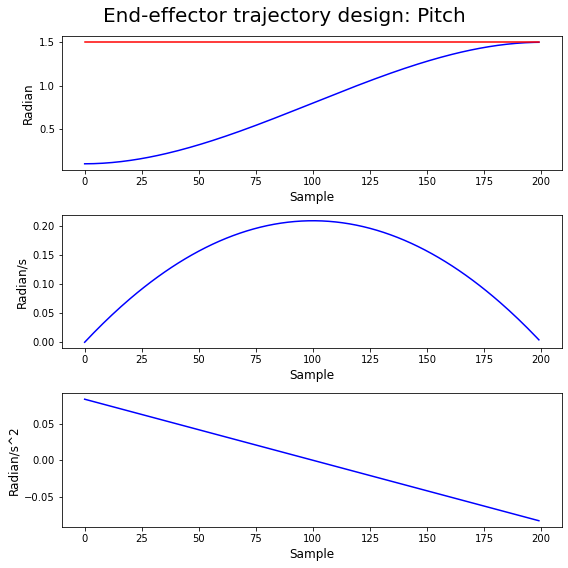

In [208]:
# for pitch orientation
Initial = Pitch_0
Final = Pitch_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Pitch_Pos, Pitch_Vel, Pitch_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory design: Pitch', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t*(1/timestep),Pitch_Pos.T,'b')
        axes[kin].plot(t*(1/timestep),np.ones(len(t))*Obj_GraspOrn[1],color=ListMarker[1],label='Pitch_Obj'+str(obj))
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t*(1/timestep),Pitch_Vel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t*(1/timestep),Pitch_Accel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/Pitch_ForObj'+str(obj)+'_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)

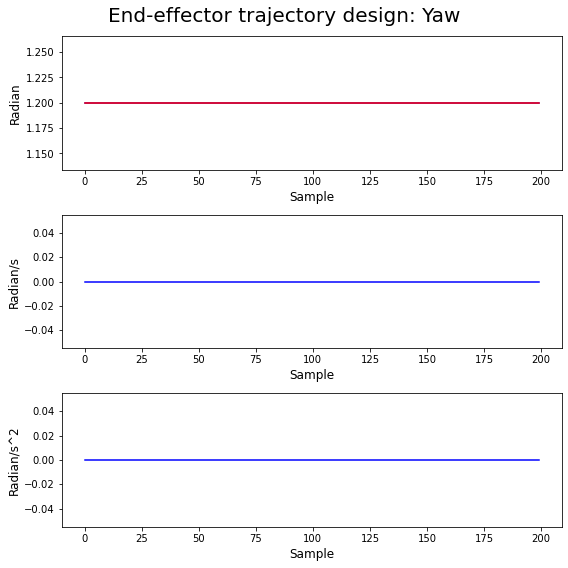

In [209]:
# for yaw orientation
Initial = Yaw_0
Final = Yaw_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Yaw_Pos, Yaw_Vel, Yaw_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory design: Yaw', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t*(1/timestep),Yaw_Pos.T,'b')
        axes[kin].plot(t*(1/timestep),np.ones(len(t))*Obj_GraspOrn[2],color=ListMarker[1],label='Yaw_Obj'+str(obj))
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t*(1/timestep),Yaw_Vel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t*(1/timestep),Yaw_Accel.T,'b')
        
        axes[kin].set_xlabel('Sample',fontsize=12)
        axes[kin].set_ylabel('Radian/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/Yaw_ForObj'+str(obj)+'_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)

# Saving the kinematics for later reading in online performance 

In [210]:
Kins_Pos = np.concatenate((X_Pos.T, Y_Pos.T, Z_Pos.T, Roll_Pos.T, Pitch_Pos.T, Yaw_Pos.T), axis = 1)

In [211]:
Kins_Pos.shape

(200, 6)

In [212]:
type(Kins_Pos)

numpy.ndarray

In [213]:
with open('./PlannedTrajectories/Kins_Pos_'+str(Example)+'.npy', 'wb') as f:
    np.save(f, Kins_Pos)


In [214]:
with open('./PlannedTrajectories/Kins_Pos_'+str(Example)+'.npy', 'rb') as f:
    data = np.load(f)

In [200]:
data.shape[0]

200

# Replay the results of online to check with upper plots

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math

In [2]:
data = pd.read_csv('Data/20210318/Obj1_ReplayKins_3.csv')

In [3]:
data

,Sample(20Hz),X_Pos,Y_Pos,Z_Pos,Roll,Pitch,Yaw
0,1,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
1,2,-0.1647,-0.0900,0.2476,3.0613,0.1054,1.1998
2,3,-0.1647,-0.0900,0.2477,3.0613,0.1055,1.1997
3,4,-0.1647,-0.0901,0.2477,3.0613,0.1057,1.1997
4,5,-0.1648,-0.0902,0.2478,3.0613,0.1061,1.1997
...,...,...,...,...,...,...,...
195,196,-0.3527,-0.3527,0.2359,3.0577,1.4923,1.1962
196,197,-0.3528,-0.3528,0.2356,3.0577,1.4937,1.1962
197,198,-0.3528,-0.3529,0.2353,3.0578,1.4948,1.1962
198,199,-0.3528,-0.3529,0.2350,3.0578,1.4958,1.1963


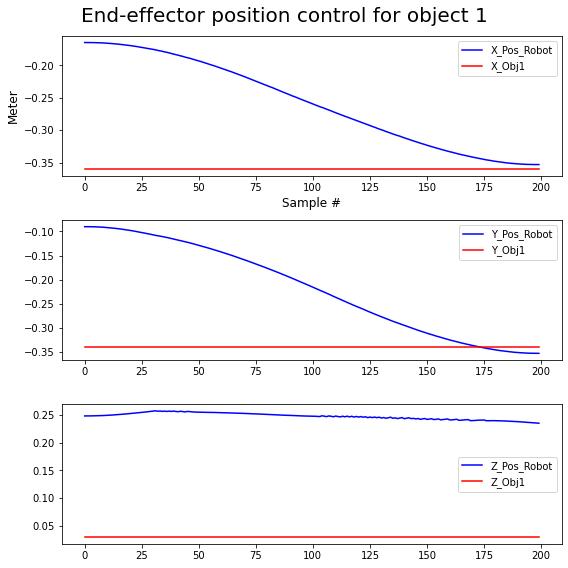

In [7]:
# ploting the position coordination of end-effector compared with object positions

%matplotlib inline

#obj = 2
#obj_pos = [-0.64, 0, 0.2]

#obj = 3
#obj_pos = [-0.45, 0.45, 0.2]

# for testing
#obj = 4
#obj_pos = [-0.45, -0.45, 0.2]


ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector position control for object '+str(obj), fontsize=20)

for position in range(3):

    if position == 0:
        axes[position].plot(np.arange(len(data['X_Pos'])),data['X_Pos'],color=ListMarker[0], label='X_Pos_Robot')
        axes[position].plot(np.arange(len(data['X_Pos'])),np.ones(len(data['X_Pos']))*Obj_GraspPos[0],color=ListMarker[1],label='X_Obj'+str(obj))
        
        axes[position].set_xlabel('Sample #',fontsize=12)
        axes[position].set_ylabel('Meter',fontsize=12)
        axes[position].legend(loc=0)
        #axes[position].set_ylim([-1,1])

    elif position == 1:
        axes[position].plot(np.arange(len(data['Y_Pos'])),data['Y_Pos'],color=ListMarker[0],label='Y_Pos_Robot')
        axes[position].plot(np.arange(len(data['Y_Pos'])),np.ones(len(data['Y_Pos']))*Obj_GraspPos[1],color=ListMarker[1], label='Y_Obj'+str(obj))
        axes[position].legend(loc=1)
        #axes[position].set_ylim([-1,1])
        
    elif position == 2:
        axes[position].plot(np.arange(len(data['Z_Pos'])),data['Z_Pos'],color=ListMarker[0], label='Z_Pos_Robot')
        axes[position].plot(np.arange(len(data['Z_Pos'])),np.ones(len(data['Z_Pos']))*Obj_GraspPos[2],color=ListMarker[1], label='Z_Obj'+str(obj))
        axes[position].legend(loc=0)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/XYZ_ForObj'+str(obj)+'_Replayed_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)

In [8]:
# plot 3D trajectory
# 3D plot for the first 3 FA signals; choose the options 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib qt
#%matplotlib notebook

ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_xlim([0,15])
#ax.set_ylim([-5,5])
#ax.set_zlim([-5,5])

for target in range(3):
    
    # Data for a three-dimensional line
    xline = data['X_Pos']
    yline = data['Y_Pos']
    zline = data['Z_Pos']
    ax.plot3D(xline, yline, zline)
    
plt.show()
ax.legend(loc=0)



No handles with labels found to put in legend.


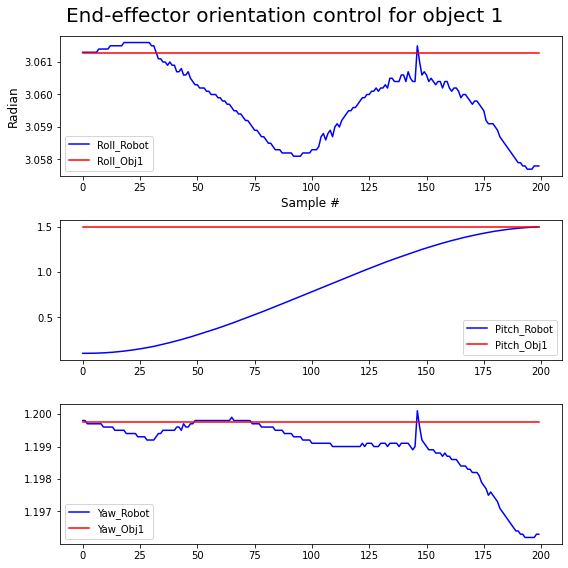

In [9]:
# ploting the orientation coordination of end-effector compared with object orientations

%matplotlib inline

# for testing
#obj = 4
#obj_Orn = [-math.pi/3, 0, 0]

ListMarker = ['blue','red']
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector orientation control for object '+str(obj), fontsize=20)

for Orn in range(3):

    if Orn == 0:
        axes[Orn].plot(np.arange(len(data['Roll'])),data['Roll'],color=ListMarker[0], label='Roll_Robot')
        axes[Orn].plot(np.arange(len(data['Roll'])),np.ones(len(data['Roll']))*Obj_GraspOrn[0],color=ListMarker[1],label='Roll_Obj'+str(obj))
        
        axes[Orn].set_xlabel('Sample #',fontsize=12)
        axes[Orn].set_ylabel('Radian',fontsize=12)
        axes[Orn].legend(loc=0)
        #axes[position].set_ylim([-1,1])

    elif Orn == 1:
        axes[Orn].plot(np.arange(len(data['Pitch'])),data['Pitch'],color=ListMarker[0],label='Pitch_Robot')
        axes[Orn].plot(np.arange(len(data['Pitch'])),np.ones(len(data['Pitch']))*Obj_GraspOrn[1],color=ListMarker[1], label='Pitch_Obj'+str(obj))
        axes[Orn].legend(loc=0)
        #axes[position].set_ylim([-1,1])
        
    elif position == 2:
        axes[Orn].plot(np.arange(len(data['Yaw'])),data['Yaw'],color=ListMarker[0], label='Yaw_Robot')
        axes[Orn].plot(np.arange(len(data['Yaw'])),np.ones(len(data['Yaw']))*Obj_GraspOrn[2],color=ListMarker[1], label='Yaw_Obj'+str(obj))
        axes[Orn].legend(loc=0)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./PlannedTrajectories/RollPitchYaw_ForObj'+str(obj)+'_Replayed_'+str(Example)+'.png',facecolor='w', transparent=False, dpi=300)